In [125]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import geopandas as gpd
import json
import geojson

%matplotlib inline

In [126]:
# Importing listings_summary.csv and neighbourhoods.geojson

listingsSummaryBerlin = pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/listings_summary.csv")
geojsonBerlin = gpd.GeoDataFrame.from_file("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/neighbourhoods.geojson")

#https://towardsdatascience.com/airbnb-in-sydney-an-exploratory-data-analysis-ec91334e4780

In [127]:
# Updating with necessary columns only

listingsSummaryBerlin = listingsSummaryBerlin[['id','neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','price','host_since',
    'guests_included','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable','cancellation_policy']]

In [128]:
# Data cleaning of price column by removing $ and changing type to float
listingsSummaryBerlin.price = listingsSummaryBerlin.price.replace('[\$,]', '', regex=True).astype(float)

In [129]:
# For the listings according to the neighborhood, we run below lines
mapListingsBerlin = pd.DataFrame(listingsSummaryBerlin.groupby(['neighbourhood_cleansed']).id.count()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
mapListingsBerlin.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

In [130]:
# Create a new dataframe for ratings grouped by neighbourhood
mapRatings = pd.DataFrame(listingsSummaryBerlin.groupby(['neighbourhood_cleansed']).review_scores_rating.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
mapRatings.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

In [131]:
# Create new dataframe for listings grouped by neighbourhood
mapPrice = pd.DataFrame(listingsSummaryBerlin.groupby(['neighbourhood_cleansed']).price.mean()).reset_index()

# Rename column in neighbourhood_cleansed dataframe
mapPrice.rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'listings'}, inplace=True)

In [132]:
# Drop the column neighbourhood_group, no useful data
geojsonBerlin.drop(columns=['neighbourhood_group'],inplace=True)

In [133]:
# Merge listings, price and ratings with geo
geojsonBerlin = geojsonBerlin.merge(mapListingsBerlin, on='neighbourhood')
geojsonBerlin = geojsonBerlin.merge(mapPrice, on='neighbourhood')
geojsonBerlin = geojsonBerlin.merge(mapRatings, on='neighbourhood')

In [134]:
geojsonBerlin.head(3)

,neighbourhood,geometry,listings,price,review_scores_rating
0,Blankenfelde/Niederschönhausen,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",65,71.892308,95.934783
1,Helmholtzplatz,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",488,83.254098,95.338384
2,Wiesbadener Straße,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",58,69.155172,94.937500


Text(0.5, 1.0, 'Listings per Neighbourhood, Airbnb Berlin')

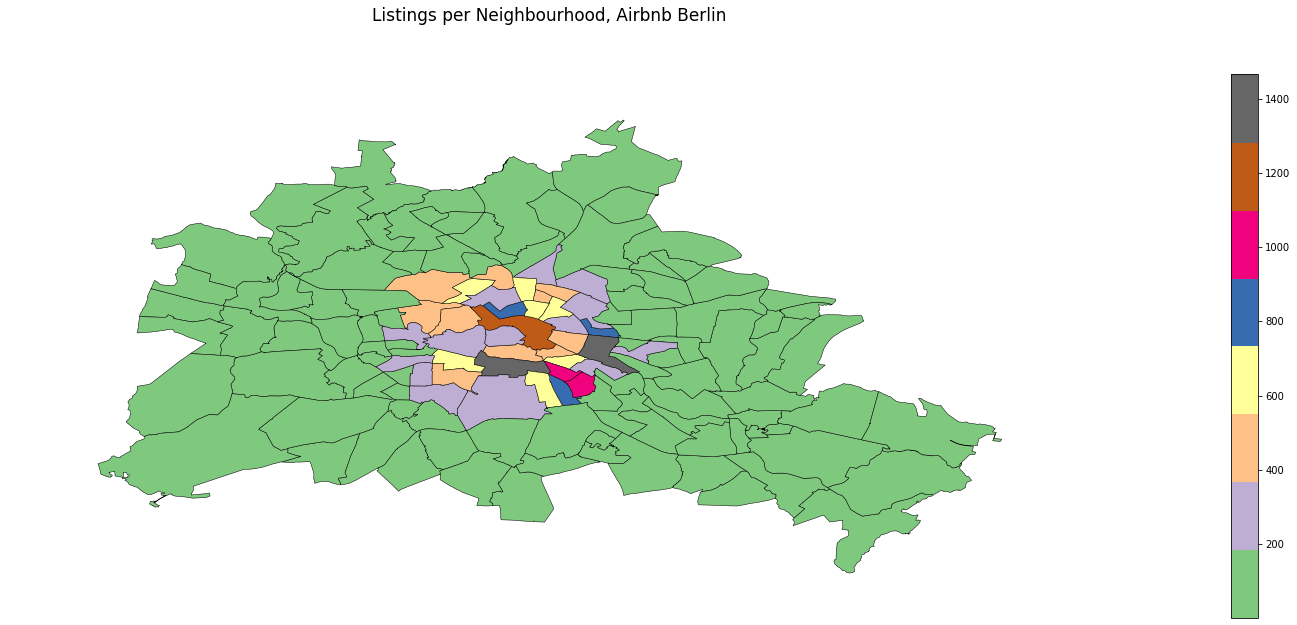

In [135]:
# Map of listings in AirBnb-Berlin

#https://matplotlib.org/tutorials/colors/colormaps.html
gplt.choropleth(geojsonBerlin, hue=geojsonBerlin['listings'], projection=gcrs.PlateCarree(),cmap='Accent', linewidth=0.5, edgecolor='black', legend=True, figsize=(50, 10))
plt.title("Listings per Neighbourhood, Airbnb Berlin", fontsize=17, pad=53)

Text(0.5, 1.0, 'Avg. Rating per Neighbourhood, Airbnb Berlin')

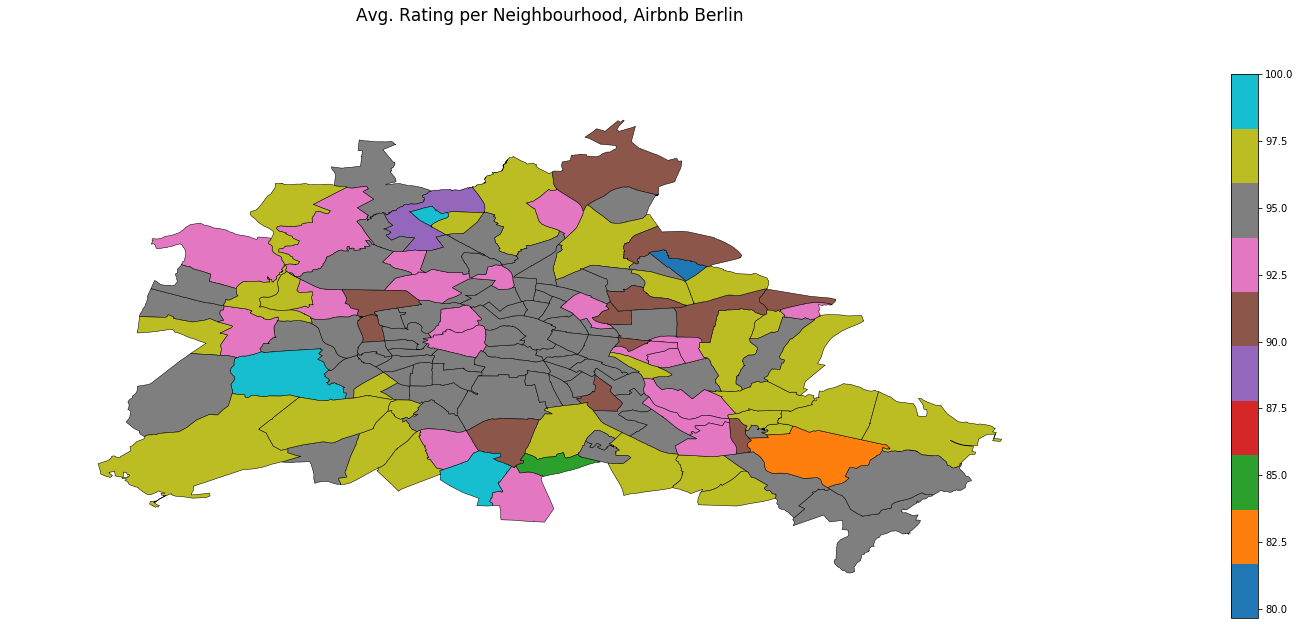

In [136]:
# Average ratings of properties in AirBnb-Berlin

#https://matplotlib.org/tutorials/colors/colormaps.html
gplt.choropleth(geojsonBerlin, hue=geojsonBerlin['review_scores_rating'], projection=gcrs.PlateCarree(),cmap='tab10', linewidth=0.5, edgecolor='black', legend=True, figsize=(50, 10))
plt.title("Avg. Rating per Neighbourhood, Airbnb Berlin", fontsize=17, pad=53)
#plt.savefig("airbnb_ratings_suburb.png", bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'Avg. Listing Price per Neighbourhood, Airbnb Berlin')

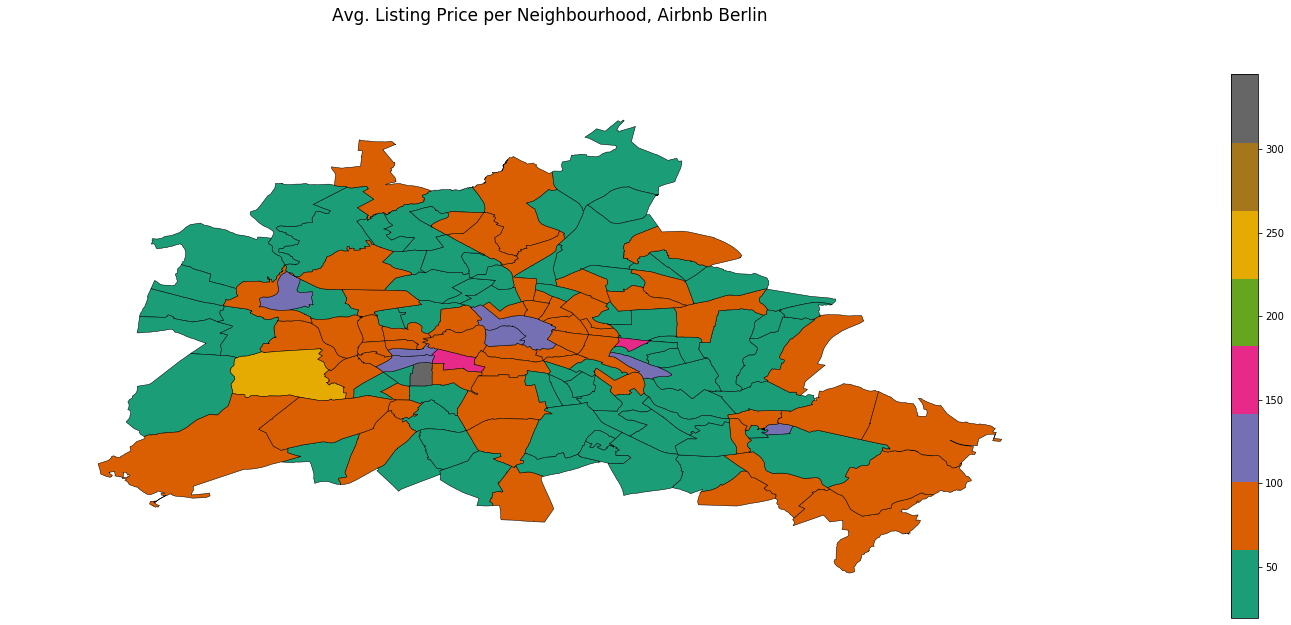

In [137]:
# Average Price of the properties in map

#https://matplotlib.org/tutorials/colors/colormaps.html
gplt.choropleth(geojsonBerlin, hue=geojsonBerlin['price'], projection=gcrs.PlateCarree(),cmap='Dark2', linewidth=0.5, edgecolor='black', legend=True, figsize=(50, 10))
plt.title("Avg. Listing Price per Neighbourhood, Airbnb Berlin", fontsize=17, pad=53)
#plt.savefig("airbnb_price_suburb.png", bbox_inches='tight', pad_inches=0.1)